# Create your first lattice from a unit cell
In this notebook we will create a lattice using a base unitcell and a tiling scheme (Euclidean) as well as manually create a lattice
and turn that into a GeneralLayout so we can perform computations on it later

In [23]:
from GraphCodes.UnitCell import UnitCell
from GraphCodes.EuclideanLayoutGenerator2 import EuclideanLayout
from GraphCodes.GeneralLayoutGenerator import GeneralLayout
from GraphCodes.resonator_utility import rotate_resonators, shift_resonators
import matplotlib.pyplot as plt
import numpy as np

## Generating the lattice

In [2]:
cell = UnitCell('square')

In [5]:
lattice = EuclideanLayout(xcells=5, ycells=5, initialCell=cell, lattice_type='square')

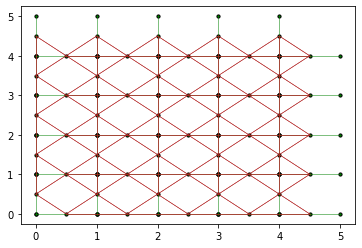

In [6]:
ax = plt.subplot(111)
lattice.draw_resonator_lattice(ax)
lattice.draw_resonator_end_points(ax)
lattice.draw_SDlinks(ax)
lattice.draw_SD_points(ax)

## Generating a lattice from a list of resonators

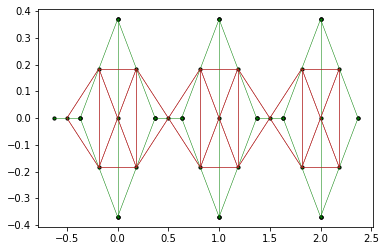

In [21]:
# Using the Peter Chain example from our first lattice test chip
# Here we use a bunch of functions but at the end of the day we're really
# just using the layout objects and concatenating stuff
# Here the recipe is simple: create three copies of a PeterChain lattice and
# stack them with some spacing

cell = UnitCell(lattice_type = 'PeterChain')
initialLayout = EuclideanLayout(xcells = 3, ycells = 1, lattice_type = 'PterChain_3_1', 
                                side = 1, file_path = '', modeType = 'FW',
                                initialCell = cell)
ax = plt.subplot(111)
initialLayout.draw_resonator_lattice(ax)
initialLayout.draw_resonator_end_points(ax)
initialLayout.draw_SDlinks(ax)
initialLayout.draw_SD_points(ax)

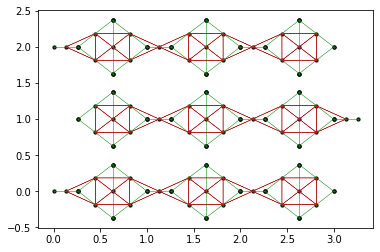

In [53]:
# Creating three copies of the lattice and arranging them in preparation for the full lattice
resonators = initialLayout.resonators
resonators = shift_resonators(resonators, -resonators[0][0], -resonators[0][1])
first_row = resonators
second_row = shift_resonators(rotate_resonators(first_row, -np.pi), max(first_row[:,2])+first_row[1,0],1)
third_row = shift_resonators(first_row,0,2)
full_lattice = GeneralLayout(resonators=np.vstack([first_row, second_row, third_row]))
ax = plt.subplot(111)
full_lattice.draw_resonator_lattice(ax)
full_lattice.draw_resonator_end_points(ax)
full_lattice.draw_SDlinks(ax)
full_lattice.draw_SD_points(ax)

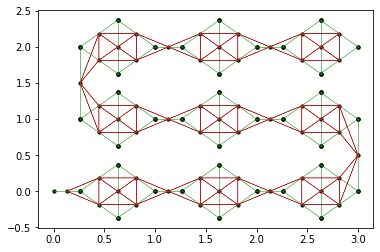

In [55]:
# Need to identify two resonators here to finish up the connections: the first resonator in the second row needs to 
# connect to the bottom point of the first row and same for the third row to the second one

p1 = [3,0]
p2 = [first_row[0][2], 1]
second_row[0] = [p1[0], p1[1], second_row[0][2], second_row[0][3]]
third_row[0] = [p2[0], p2[1], third_row[0][2], third_row[0][3]]
final_lattice = GeneralLayout(resonators=np.vstack([first_row, second_row, third_row]))
ax = plt.subplot(111)
final_lattice.draw_resonator_lattice(ax)
final_lattice.draw_resonator_end_points(ax)
final_lattice.draw_SDlinks(ax)
final_lattice.draw_SD_points(ax)

## Energy spectrum and states

Text(0, 0.5, 'Energy (|t|)')

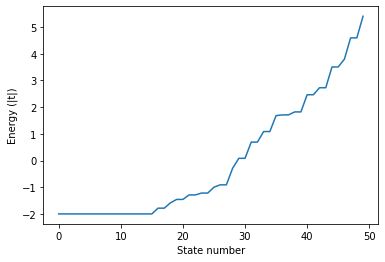

In [8]:
# Direct diagonalization of the hamiltonian
plt.plot(lattice.Es)
plt.xlabel('State number')
plt.ylabel('Energy (|t|)')

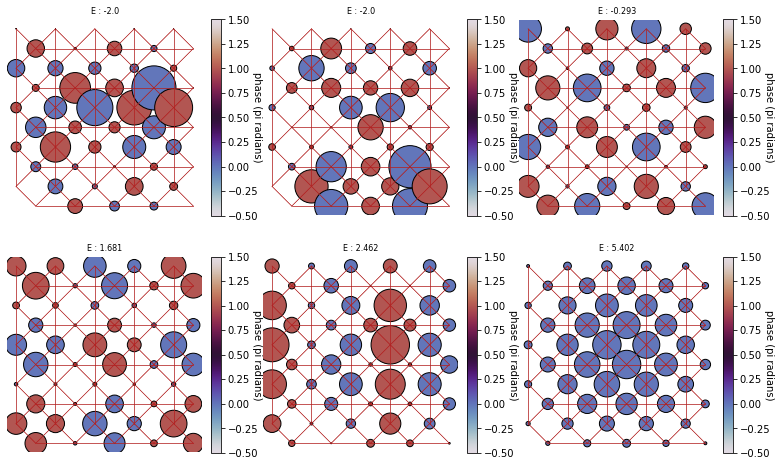

In [20]:
#Plotting some states at each energy
states = [1,10,28,35,40,49]

plt.figure(2, figsize=(13,8))
plt.clf()
ind=0
for stind in states:
    ax = plt.subplot(2,3,ind+1)
    cmap = 'twilight'
    E = lattice.Es[stind]
    state = lattice.Psis[:,stind]

    titleStr = 'E : ' + str(np.round(E, 3))


    lattice.plot_layout_state(3*state, ax,
                        title = titleStr, 
                        colorbar = True, 
                        plot_links = True, 
                        cmap = cmap, zorder = 1)


    ax.set_aspect('equal')
    ax.axis('off')
    ind+=1